# Part II - FIFA World Cup 2022 Matches Exploration
## by Zainab Qabajah



## Investigation Overview
**Goals of the Presentation:**
- To summarize key insights gained from the FIFA World Cup 2022 dataset analysis.
- To showcase visualizations that highlight team performance, match outcomes, and defensive actions.
- To provide a clear and concise summary of the dataset findings for easy understanding.

**Executive Summary:**
- Key insights from the analysis include:
  - The top-performing teams based on various metrics.
  - Patterns in match outcomes and how they relate to team performance.
  - Defensive strategies and their impact on match results.

---

## Dataset Overview and Executive Summary
**Dataset Introduction:**
- The dataset comprises detailed statistics from the FIFA World Cup 2022, including team performance metrics, match outcomes, and defensive actions.

**Summary of Findings:**
- Top-performing teams are identified through various performance metrics.
- Significant trends and patterns in match outcomes are observed.
- Defensive actions have been analyzed to understand their impact on game results.

---

In [19]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [20]:
# load in the dataset into a pandas dataframe
data = pd.read_csv('Fifa_world_cup_matches.csv')

## (Visualization 1)

This histogram displays the distribution of possession percentages for both teams in FIFA World Cup 2022 matches. 

**Key Observations:**
- **Distribution:** Possession percentages are spread across a range, with a noticeable peak around 50% for both teams.
- **Balance:** Both teams show similar possession patterns, indicating balanced matchups.

**Plot Details:**
- **Title:** Distribution of Possession Percentages
- **Axes:** x-axis labeled "Possession Percentage," y-axis labeled "Frequency"
- **Colors:** Team 1 (blue) and Team 2 (red) with a legend for clarity
- **Grid:** Enabled for better readability
 

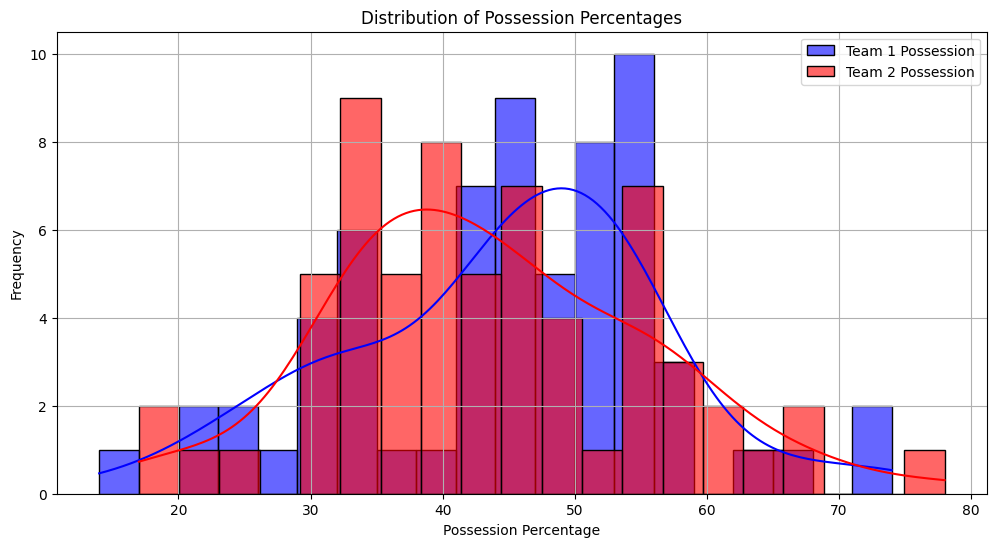

In [21]:
# Convert possession percentages to numeric after removing '%' sign
data['possession team1'] = data['possession team1'].str.replace('%', '').astype(float)
data['possession team2'] = data['possession team2'].str.replace('%', '').astype(float)

plt.figure(figsize=(12, 6))
sns.histplot(data['possession team1'], kde=True, color='blue', label='Team 1 Possession', bins=20, alpha=0.6)
sns.histplot(data['possession team2'], kde=True, color='red', label='Team 2 Possession', bins=20, alpha=0.6)
plt.title('Distribution of Possession Percentages')
plt.xlabel('Possession Percentage')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

## (Visualization 2)

This scatter plot shows the relationship between possession percentage and the number of goals scored by each team in the FIFA World Cup 2022 matches.

**Key Observations:**
- **Correlation:** There is a positive correlation between possession percentage and the number of goals scored, with higher possession generally leading to more goals.
- **Exceptions:** Some matches exhibit a high number of goals despite lower possession percentages, indicating other factors influencing match outcomes.

**Details of the Plot:**
- **Title:** Goals Scored vs. Possession Percentage
- **Axes:** The x-axis is labeled "Possession Percentage (%)" and the y-axis is labeled "Number of Goals"
- **Colors:** Points for Team 1 are in blue and for Team 2 in red, with a legend for clarity
- **Trend Lines:** Regression lines are included to show the relationship between the variables


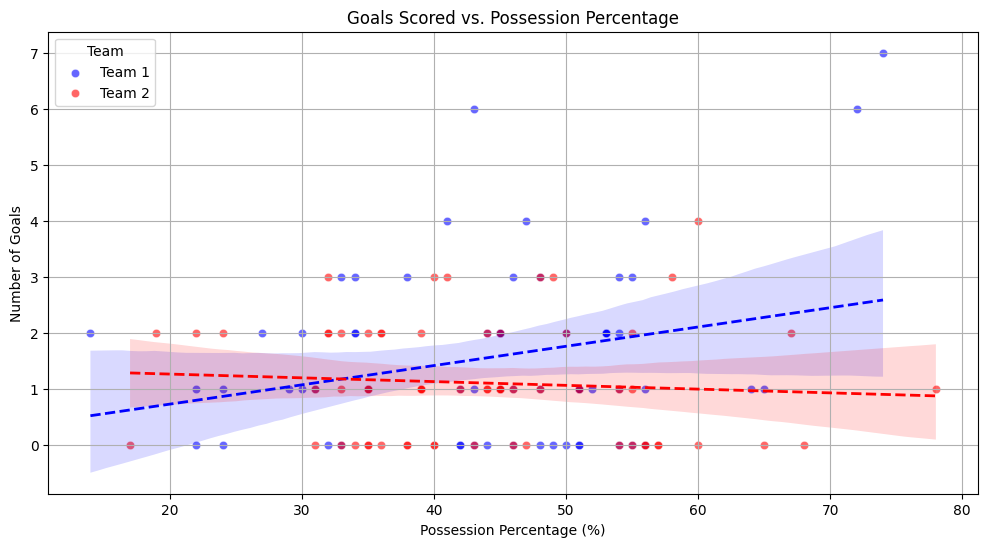

In [22]:
# Scatter plot with regression lines using seaborn
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='possession team1', y='number of goals team1', color='blue', label='Team 1', alpha=0.6)
sns.scatterplot(data=data, x='possession team2', y='number of goals team2', color='red', label='Team 2', alpha=0.6)
sns.regplot(data=data, x='possession team1', y='number of goals team1', scatter=False, color='blue', line_kws={'linewidth': 2, 'linestyle': '--'})
sns.regplot(data=data, x='possession team2', y='number of goals team2', scatter=False, color='red', line_kws={'linewidth': 2, 'linestyle': '--'})

plt.title('Goals Scored vs. Possession Percentage')
plt.xlabel('Possession Percentage (%)')
plt.ylabel('Number of Goals')
plt.legend(title='Team')
plt.grid(True)
plt.show()


## (Visualization 3)

This box plot illustrates the distribution of defensive pressures applied by teams across different match categories in the FIFA World Cup 2022.

**Key Observations:**
- **Distribution:** The plot reveals the spread and central tendency of defensive pressures applied by Team 1 and Team 2 across various match categories.
- **Comparison:** By comparing the two teams, it is possible to identify patterns or differences in defensive strategies between teams.

**Details of the Plot:**
- **Title:** Defensive Pressures Applied by Match Category
- **Axes:** The x-axis is labeled "Match Category" and the y-axis is labeled "Defensive Pressures Applied"
- **Colors:** Box plots for Team 1 are in blue and for Team 2 are in red, with a legend for clarity
- **Details:** Outliers are excluded to focus on the main distribution of defensive actions

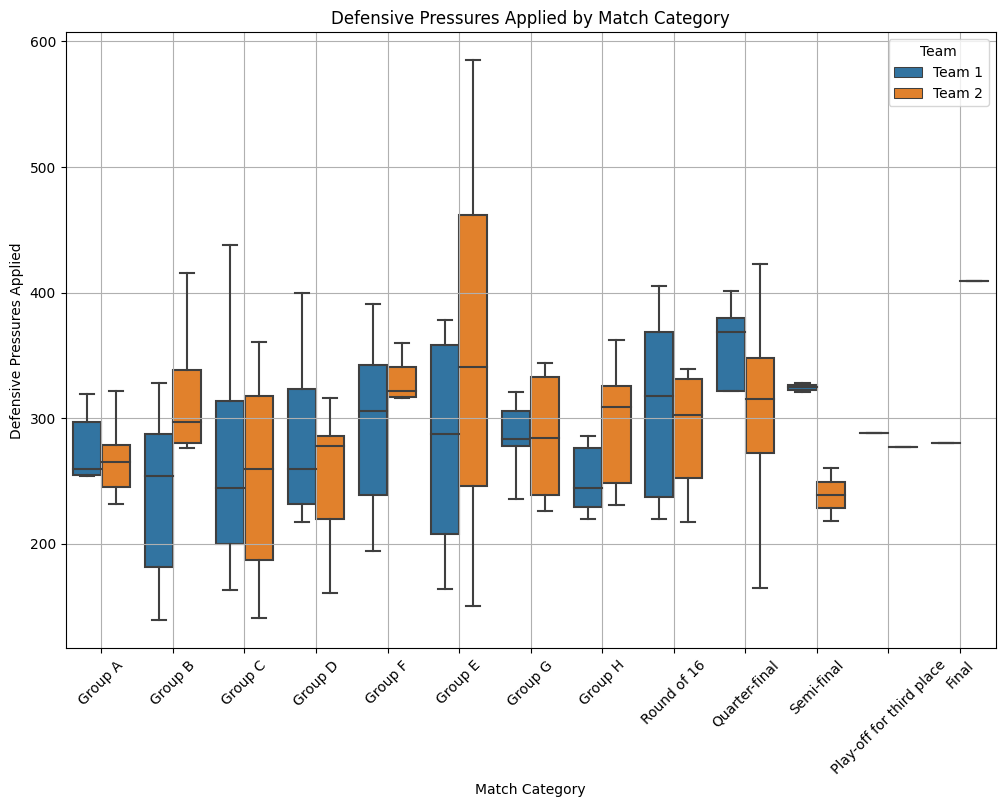

In [23]:
# Create a new column to combine team data for plotting
data_melted = data.melt(id_vars='category', value_vars=['defensive pressures applied team1', 'defensive pressures applied team2'],
                        var_name='Team', value_name='Defensive Pressures')

# Rename columns for clarity
data_melted['Team'] = data_melted['Team'].map({
    'defensive pressures applied team1': 'Team 1',
    'defensive pressures applied team2': 'Team 2'
})

# Box plot of defensive actions by team
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_melted, x='category', y='Defensive Pressures', hue='Team', showfliers=False)

plt.title('Defensive Pressures Applied by Match Category')
plt.xlabel('Match Category')
plt.ylabel('Defensive Pressures Applied')
plt.xticks(rotation=45)
plt.legend(title='Team')
plt.grid(True)
plt.show()
